This function evaluates a guess_word given a target_word (right answer) 

In [9]:
def wordle_feedback(target_word, guess_word):
    green = [(i, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t == g]
    remaining = [(i, t, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t != g]
    
    remaining_target = [t for i, t, g in remaining]
    yellow = []
    black = []

    for i, t, g in remaining:
        if g in remaining_target:
            yellow.append((i, g))
            remaining_target.remove(g)  # Remove the letter from the target list so it can't be used again
        else:
            black.append((i, g))

    return {"green": green, "yellow": yellow, "black": black}

# Testing
target_word = 'applp'
guess_word = 'ppppa'
print(wordle_feedback(target_word, guess_word))
target_word = 'applp'
guess_word = 'xxxxx'
print(wordle_feedback(target_word, guess_word))
target_word = 'applp'
guess_word = 'xxpxx'
print(wordle_feedback(target_word, guess_word))

{'green': [(1, 'p'), (2, 'p')], 'yellow': [(0, 'p'), (4, 'a')], 'black': [(3, 'p')]}
{'green': [], 'yellow': [], 'black': [(0, 'x'), (1, 'x'), (2, 'x'), (3, 'x'), (4, 'x')]}
{'green': [(2, 'p')], 'yellow': [], 'black': [(0, 'x'), (1, 'x'), (3, 'x'), (4, 'x')]}


This function checks to see if a word is consistent with a feed back dictionary as per above

In [10]:
def is_consistent(word, feedback):
    # Create list from word and a copy for yellow check
    word_list = list(word)
    remaining_letters = word_list.copy()

    # 'green' checks: correct letter must be at the correct index
    for index, letter in feedback['green']:
        if word_list[index] != letter:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'yellow' checks: correct letter can't be at the same index, but must exist elsewhere
    for index, letter in feedback['yellow']:
        if word_list[index] == letter or letter not in remaining_letters:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'black' checks: letter must not be in the word at all
    for index, letter in feedback['black']:
        if letter in remaining_letters:
            return False

    return True

# Testing
feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'a')], "black": [(3, 'e'), (4, 'r')]}
word = 'apple'
print(is_consistent(word, feedback))  # Returns False

word = 'tppap'
print(is_consistent(word, feedback))  # Returns True

feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'p')], "black": [(3, 'e'), (4, 'r')]}
word = 'pppmm'
print(is_consistent(word, feedback))  # Returns False
word = 'oppap'
print(is_consistent(word, feedback))  # Returns True

feedback = {"green": [(1, 'p'), (2, 'p')], "yellow": [(0, 'o')], "black": [(3, 'p'), (4, 'r')]}
word = 'pppom'
print(is_consistent(word, feedback))  # Returns False
word = 'xppom'
print(is_consistent(word, feedback))  # Returns True


False
True
False
True
False
True


#create_histogram(df)

Given a data frame of the dictionary as described below (df), this function creates a historgram of the letters 1 through 5 corresponding to one-hot-encoding.

#one_hot_encode(word)

Given a word (word), this function creates a matrix of one hot encoded vectors from this word.

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('5_letters.csv')
    
import pandas as pd
import matplotlib.pyplot as plt


def create_histogram(df):
    import pandas as pd
    import numpy as np
    
    #determine the dimensions of the input data frame
    num_rows, num_columns = df.shape
    
    #create an array of all the letters in the alphabet
    alphabet = list('abcdefghijklmnopqrstuvwxyz')

    #assign the ith row of the output array so that the elements of the row is the probility of each letter 
    #showing up in the ith position assuming one hot encoding of a word
    
    i=0
    arr = np.zeros((5,26))
    for column in df.columns:
        histogram_vector = df[column].value_counts().sort_index()
        histogram_vector = histogram_vector.reindex(alphabet).fillna(0)
        numpy_histogram_vector = histogram_vector.reindex(alphabet).fillna(0).values
        arr[i,:] = numpy_histogram_vector.reshape(-1)
        i += 1
        
    return arr/num_rows

histogram = create_histogram(df)

def one_hot_encode(word):
    
    import numpy as np
    
    # List of letters from 'a' to 'z'
    letters = [chr(i) for i in range(ord('a'), ord('z')+1)]

    # Create a dictionary to map letters to their one-hot encoding
    one_hot_encoding = {letter: np.eye(1, len(letters), i, dtype=int).flatten() for i, letter in enumerate(letters)}

    i = 0 
    ENCODED_WORD = np.zeros([5,26])
    while i <= 8:
        ENCODED_WORD[i//2,:] = np.array([one_hot_encoding[letter] for letter in word[i]])
        i += 2
        
    return ENCODED_WORD

#word = df.iloc[0].to_string(index=False)

#word_enc = one_hot_encode(word)

#print(np.sum(word_enc*histogram))

Q = []

for i in range(2499):
    
    word = df.iloc[i].to_string(index=False)
    
    #print(word)
    
    word_enc = one_hot_encode(word)
    
    #print(np.sum(word_enc*histogram))
    
    Q.append(np.sum(word_enc*histogram))
    
#print(Q)

max_value = max(Q)
max_index = max(enumerate(Q), key=lambda x: x[1])[0]

print("Maximum value:", max_value)
print("Index of maximum value:", max_index)

print(df.iloc[max_index]) 

word = df.iloc[max_index].to_string(index=False)

a = word.replace('\n', '')

print(a)

print(np.sum(one_hot_encode(word)*histogram))


Feed = wordle_feedback(a, a)

Feed['green']
    

Maximum value: 0.8959583833533413
Index of maximum value: 911
1    c
2    o
3    r
4    e
5    s
Name: 911, dtype: object
cores
0.8959583833533413


[(0, 'c'), (1, 'o'), (2, 'r'), (3, 'e'), (4, 's')]

In [20]:
#Now let's play a single turn of Wordle

#inputing libraries 
import pandas as pd
import numpy as np

#downloading vocabulary as a data frame
df = pd.read_csv('5_letters.csv')

# print the DataFrame
#print(df)

#Assigning target word
target_word = "zones"

#maximum 30 guesses
for n in range(30):
    histogram = create_histogram(df)

    Q = []
    
    #creating Q table
    for i in range(len(df)):
    
        word = df.iloc[i].to_string(index=False)    
    
        word_enc = one_hot_encode(word)
    
        Q.append(np.sum(word_enc*histogram))
    
    #deterine index and value of maximum Q
    max_value = max(Q)
    max_index = max(enumerate(Q), key=lambda x: x[1])[0]

    #Finding word for next guess from data table
    word = df.iloc[max_index].to_string(index=False)
    
    #converting the guess to a single string
    input = word.replace('\n', '')
    
    print(input)
    
    #Getting feedback
    Feed = wordle_feedback(target_word, input)
    
    #Breaking loop if guess is correct
    if len(Feed['green']) == 5:
        print("the number of guesses:", n+1)
        break

    #If greens < 5, then removing ALL words that are not consistent with feedback
    for index, row in df.iterrows():
        # Convert the row to a single string without newline characters
        row_data = row.to_string(index=False).replace('\n', '')
    
        # Check if the row data is consistent with the 'Feed' variable
        if not is_consistent(row_data, Feed):
            # Drop the row from the DataFrame if it is not consistent
            df.drop(index, inplace=True)
    
    #resetting index to be consecutive for next guess
    df = df.reset_index(drop=True)


cores
doles
bones
tones
zones
the number of guesses: 5


#play(DF, target_word)

Given a DF which represents the original dictionary and a target_word, this function plays a game of Wordle.

In [22]:
def play(DF,target_word):

    #inputing libraries 
    import pandas as pd
    import numpy as np

    #converting to internal data frame
    df = DF

    #maximum 10 guesses
    for n in range(10):
        histogram = create_histogram(df)

        Q = []
    
        #creating Q table
        for i in range(len(df)):
    
            word = df.iloc[i].to_string(index=False)    
    
            word_enc = one_hot_encode(word)
    
            Q.append(np.sum(word_enc*histogram))
    
        #deterine index and value of maximum Q
        max_value = max(Q)
        max_index = max(enumerate(Q), key=lambda x: x[1])[0]

        #Finding word for next guess from data table
        word = df.iloc[max_index].to_string(index=False)
    
        #converting the guess to a single string
        input = word.replace('\n', '')
    
        print(input)
    
        #Getting feedback
        Feed = wordle_feedback(target_word, input)
    
        #Breaking loop if guess is correct
        if len(Feed['green']) == 5:
            print("the number of guesses:", n+1)
            return n+1
            break

        #If greens < 5, then removing ALL words that are not consistent with feedback
        for index, row in df.iterrows():
            # Convert the row to a single string without newline characters
            row_data = row.to_string(index=False).replace('\n', '')
    
            # Check if the row data is consistent with the 'Feed' variable
            if not is_consistent(row_data, Feed):
                # Drop the row from the DataFrame if it is not consistent
                df.drop(index, inplace=True)
    
        #resetting index to be consecutive for next guess
        df = df.reset_index(drop=True)


In [28]:
#DF = pd.read_csv('5_letters.csv')
#DF_copy = DF.copy(deep=False)

guesses = []

for p in range(2499):
    DF = pd.read_csv('5_letters.csv')
    guesses.append(play(DF,DF.iloc[p].to_string(index=False).replace('\n', '')))


cores
dutch
flack
aback
the number of guesses: 4
cores
sense
abase
the number of guesses: 3
cores
beige
fable
abate
the number of guesses: 4
cores
billy
abaya
the number of guesses: 3
cores
baked
abbey
the number of guesses: 3
cores
aloof
anion
abbot
the number of guesses: 4
cores
beets
abets
the number of guesses: 3
cores
brood
abhor
the number of guesses: 3
cores
beige
abide
the number of guesses: 3
cores
elope
abode
the number of guesses: 3


KeyboardInterrupt: 

In [177]:
print(guesses)

[4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 2, 2, 3, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 5, 3, 3, 4, 3, 4, 3, 4, 5, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 2, 5, 4, 5, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 5, 3, 3, 3, 4, 3, 4, 5, 3, 2, 3, 3, 4, 4, 2, 5, 5, 3, 4, 3, 5, 4, 4, 5, 3, 4, 4, 4, 3, 4, 4, 5, 3, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 5, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 5, 4, 4, 3, 2, 4, 5, 4, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 5, 4, 3, 5, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 5, 3, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 3, 3, 3, 5, 4, 3, 3, 5, 4, 3, 5, 4, 3, 3, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 5, 3, 4, 3, 4, 5, 4, 4, 2, 3, 4, 4, 4, 2, 3, 5, 3, 2, 3, 4, 4, 3, 3, 6, 4, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 4, 3, 3, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 4, 6, 3, 4, 3, 3, 7, 4, 5, 3, 3, 3, 3, 3, 4, 3, 

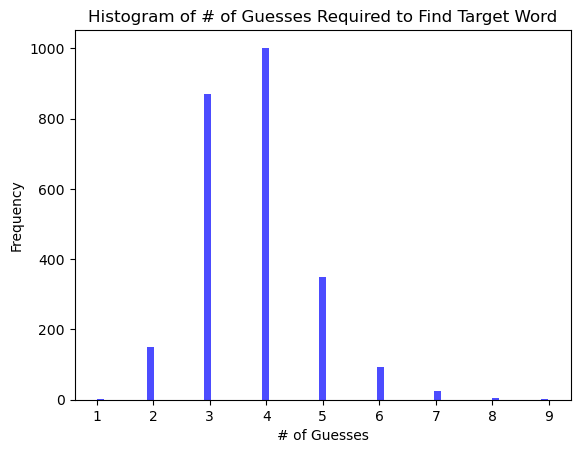

Mean: 3.7850280224179342
Number of elements >= 7: 32
Average streak: 78.125


In [189]:
import matplotlib.pyplot as plt

# Example list of numerical data
data = guesses

# Generate the histogram
plt.hist(data, bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Customize the histogram (optional)
plt.title('Histogram of # of Guesses Required to Find Target Word')
plt.xlabel('# of Guesses')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

import statistics

# Calculate the mean using statistics.mean()
mean_value = statistics.mean(data)

print("Mean:", mean_value)

# Initialize a counter variable to count elements >= 7
count_greater_than_or_equal_to_7 = 0

# Loop through the list and count elements >= 7
for num in data:
    if num >= 7:
        count_greater_than_or_equal_to_7 += 1

print("Number of elements >= 7:", count_greater_than_or_equal_to_7)

print("Average streak:", 2500/count_greater_than_or_equal_to_7)
